# 0. Índice <a name="Contents"></a>
1. [Importando bibliotecas](#import)
2. [Carregando o dataframe](#read)
5. [Agregações](#agreg)
5. [Group by DTNASC e contagem da IDADEMAE](#cont_idade_mae)
    1. [Em python](#cont_python)
    2. [Em SQL](#cont_sql)
5. [Group by DTNASC e média da IDADEMAE](#med_idade_mae)
    1. [Em python](#med_python)
    2. [Em SQL](#med_sql)
5. [Exemplos](#exemplos)
    1. [Quantidade de bebês ao longo do ano](#exemplo_1)
    2. [Quantidade de bebês fem e masc ao longo do ano](#exemplo_2)
    3. [Quantidade de bebês por dia da semana](#exemplo_3)
    4. [Quantidade de bebês fem e masc por mês](#exemplo_4)
    5. [Média peso dos bebês fem e masc](#exemplo_5)
    6. [Escolaridade mãe (ESCMAE) ](#exemplo_6)
    7. [Gestacão](#exemplo_7)




# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()  
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_1 = sinasc_raw[['ESCMAE', 'IDADEMAE']]
sinasc_1.head()

,ESCMAE,IDADEMAE
0,8 a 11 anos,19
1,8 a 11 anos,29
2,8 a 11 anos,37
3,12 anos ou mais,30
4,8 a 11 anos,30


In [4]:
esc_mae = sinasc_1.groupby('ESCMAE')

In [5]:
esc_mae.mean()

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


In [6]:
esc_mae.count()

,IDADEMAE
ESCMAE,
1 a 3 anos,516
12 anos ou mais,5767
4 a 7 anos,4760
8 a 11 anos,15633
Nenhuma,40


In [7]:
esc_mae.sum()

,IDADEMAE
ESCMAE,
1 a 3 anos,14670
12 anos ou mais,170404
4 a 7 anos,117117
8 a 11 anos,393176
Nenhuma,1263


In [8]:
sinasc_2 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI']]
sinasc_2.head()

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0


In [9]:
sinasc_2.shape

(27028, 3)

In [10]:
sinasc_2.IDADEPAI.isna().sum()

19421

In [11]:
19421/27028

0.7185511321592423

In [12]:
result = sinasc_2.dropna().groupby('ESCMAE').median()
result

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,29.0,34.0
12 anos ou mais,30.0,32.0
4 a 7 anos,26.0,30.0
8 a 11 anos,25.0,29.0
Nenhuma,31.5,38.5


In [13]:
sinasc_2.groupby('ESCMAE')['IDADEMAE'].median()

ESCMAE
1 a 3 anos         28.0
12 anos ou mais    29.0
4 a 7 anos         24.0
8 a 11 anos        24.0
Nenhuma            33.0
Name: IDADEMAE, dtype: float64

In [14]:
result['DIF'] = result['IDADEPAI'] - result['IDADEMAE']
result.sort_values('DIF')

,IDADEMAE,IDADEPAI,DIF
ESCMAE,,,
12 anos ou mais,30.0,32.0,2.0
4 a 7 anos,26.0,30.0,4.0
8 a 11 anos,25.0,29.0,4.0
1 a 3 anos,29.0,34.0,5.0
Nenhuma,31.5,38.5,7.0


# 3. Agregações <a name="agreg"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)



O pandas tem alguns métodos otimizados dentro do groupby: 

| Método       | Descrição                               |
|--------------|-----------------------------------------|
| **count()**  | contagem de não *missing*               |
| **sum()**    | soma                                    |
| **mean()**   | média                                   |
| **median()** | mediana                                 |
| **std()**    | desvio padrão amostral                  |
| **var()**    | variancia amostral                      | 
| **min()**    | mínimo                                  |
| **max()**    | máximo                                  |
| **prod()**   | produto                                 |
| **first()**  | primeiro elemento                       |
| **last()**   | último elemento                         |

Além destes, diversos outros métodos do objeto agrupado também funcionam, por exemplo a função ```quantile()```.

In [15]:
sinasc = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI'
]].copy()

In [16]:
sinasc.SEXO.value_counts()

Masculino    13886
Feminino     13138
Name: SEXO, dtype: int64

In [17]:
sinasc.DTNASC.nunique()

365

In [18]:
sinasc.DTNASC.value_counts()

2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-12-25     44
2019-02-09     44
2019-07-28     44
2019-08-04     43
2019-11-03     40
Name: DTNASC, Length: 365, dtype: int64

# 4. Group by DTNASC e contagem da IDADEMAE  <a name="cont_idade_mae"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

## 4.1 Em python  <a name="cont_python"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [19]:
sinasc.groupby('DTNASC')['IDADEMAE'].count().sort_values(ascending=False)

DTNASC
2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-07-28     44
2019-12-25     44
2019-02-09     44
2019-08-04     43
2019-11-03     40
Name: IDADEMAE, Length: 365, dtype: int64

## 4.2 Em SQL  <a name="cont_sql"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)



``` sql
SELECT DTNASC, count(IDADEMAE) as contagem
FROM sinasc
GROUP BY DTNASC
ORDER BY contagem DESC
```

# 5. Group by DTNASC e média da IDADEMAE <a name="med_idade_mae"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

## 5.1 Em python <a name="med_python"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [20]:
sinasc.groupby('DTNASC', sort=False)['IDADEMAE'].mean()

DTNASC
2019-02-19    26.168539
2019-02-21    26.521277
2019-02-25    25.585366
2019-03-20    26.191919
2019-03-23    26.560000
                ...    
2019-12-31    24.823529
2019-12-15    25.355556
2019-12-21    26.742857
2019-12-22    26.404255
2019-12-28    24.864407
Name: IDADEMAE, Length: 365, dtype: float64

## 5.2 Em SQL <a name="med_sql"></a>

``` sql
SELECT DTNASC, AVG(IDADEMAE)
FROM sinasc
GROUP BY DTNASC
```

In [21]:
sinasc.groupby('DTNASC')['IDADEMAE'].mean().sort_values(ascending=False)

DTNASC
2019-02-14    28.250000
2019-11-13    28.179487
2019-11-07    27.914634
2019-10-25    27.885246
2019-09-27    27.800000
                ...    
2019-07-27    23.563636
2019-10-13    23.464286
2019-07-07    23.384615
2019-03-31    22.612245
2019-05-05    22.352941
Name: IDADEMAE, Length: 365, dtype: float64

In [22]:
sinasc.groupby('DTNASC')['IDADEMAE'].sum()

DTNASC
2019-01-01    1140
2019-01-02    1835
2019-01-03    2026
2019-01-04    1899
2019-01-05    1861
              ... 
2019-12-27    2262
2019-12-28    1467
2019-12-29    1177
2019-12-30    2098
2019-12-31    1266
Name: IDADEMAE, Length: 365, dtype: int64

In [23]:
resultado = sinasc.groupby('DTNASC')['IDADEMAE'].mean()

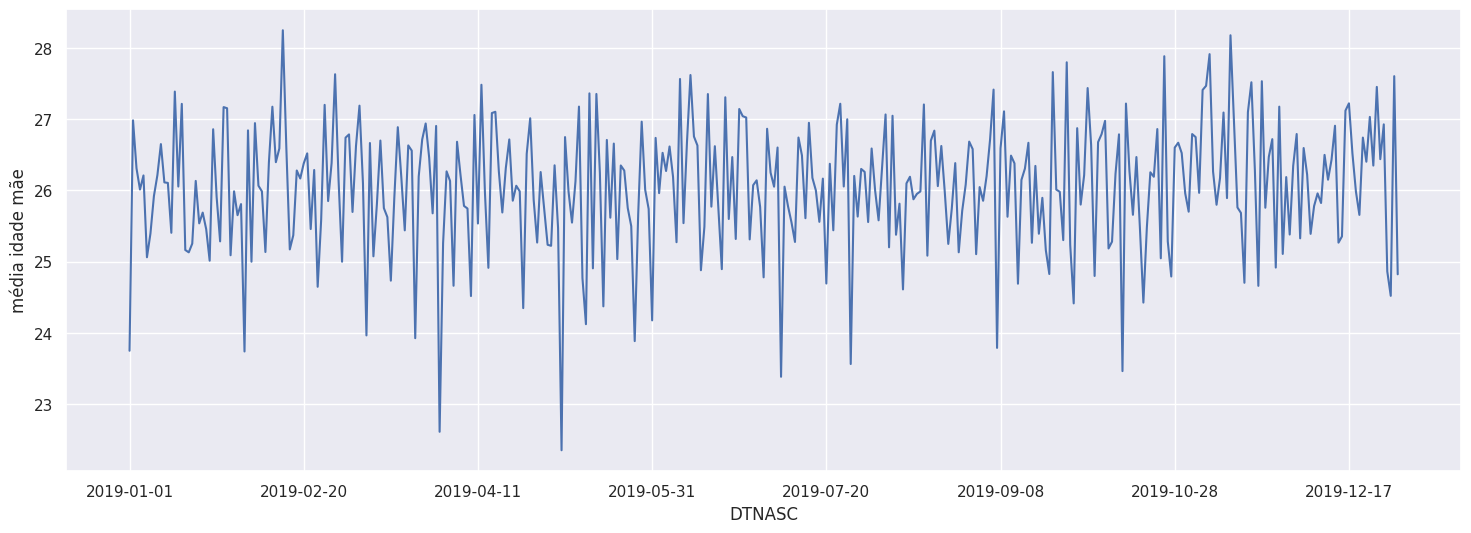

In [24]:
resultado.plot(figsize=[18, 6])
plt.ylabel('média idade mãe');

In [25]:
resultado = sinasc.groupby('DTNASC')['IDADEMAE'].count()

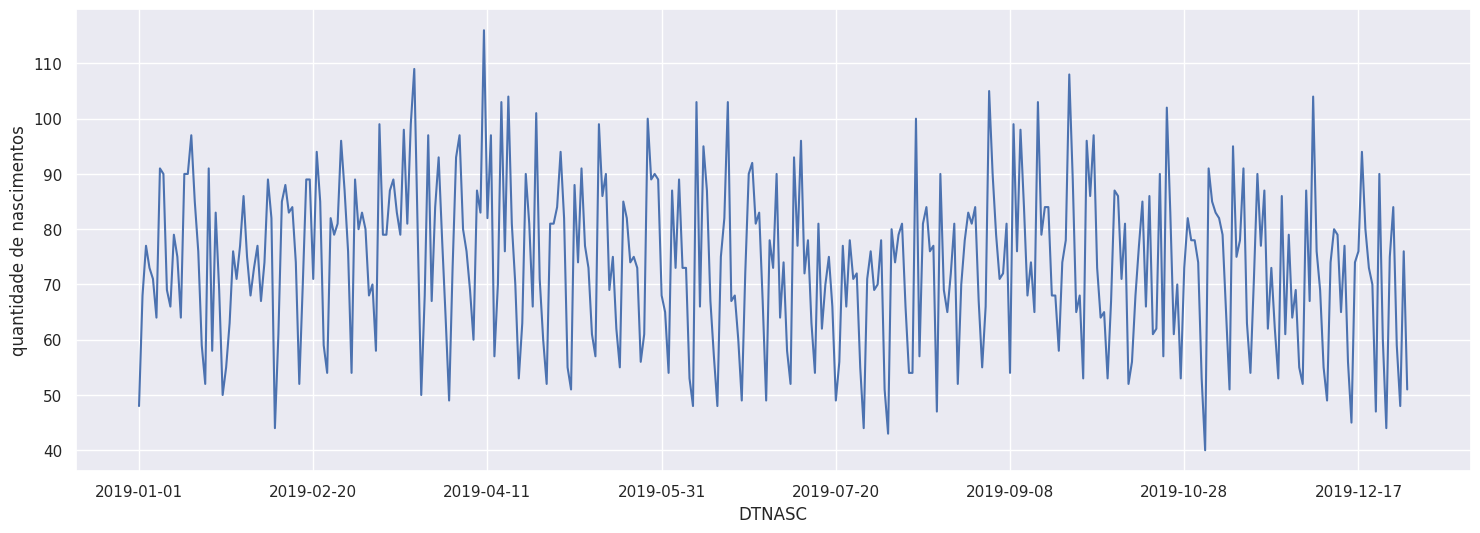

In [26]:
resultado.plot(figsize=[18,6])
plt.ylabel('quantidade de nascimentos');

# 6. Exemplos <a name="exemplos"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

## 6.1 Quantidade de bebês ao longo do ano <a name="exemplo_1"></a>


In [27]:
resultado = sinasc.groupby('DTNASC')['IDADEMAE'].count()

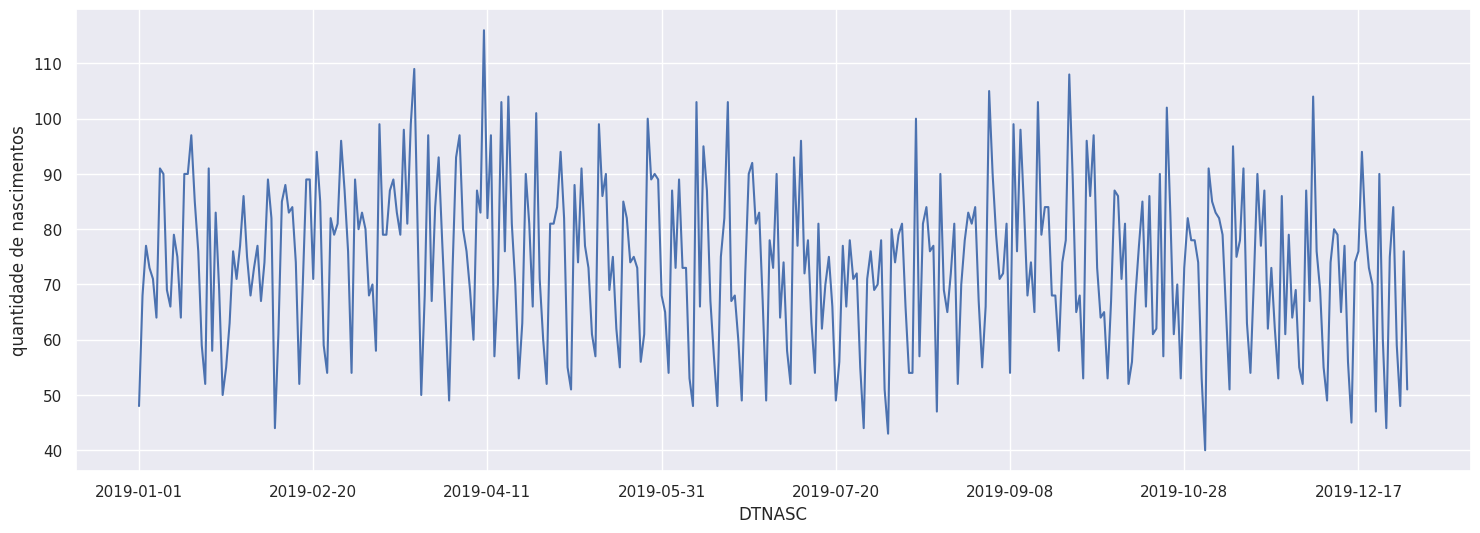

In [28]:
resultado.plot(figsize=[18,6])
plt.ylabel('quantidade de nascimentos');

## 6.2 Quantidade de bebês fem e masc ao longo do ano <a name="exemplo_2"></a>


In [29]:
sinasc['SEXO'].value_counts()

Masculino    13886
Feminino     13138
Name: SEXO, dtype: int64

In [30]:
fem = sinasc[sinasc['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADEMAE'].count()

In [31]:
masc = sinasc[sinasc['SEXO'] == 'Masculino'].groupby('DTNASC')['IDADEMAE'].count()

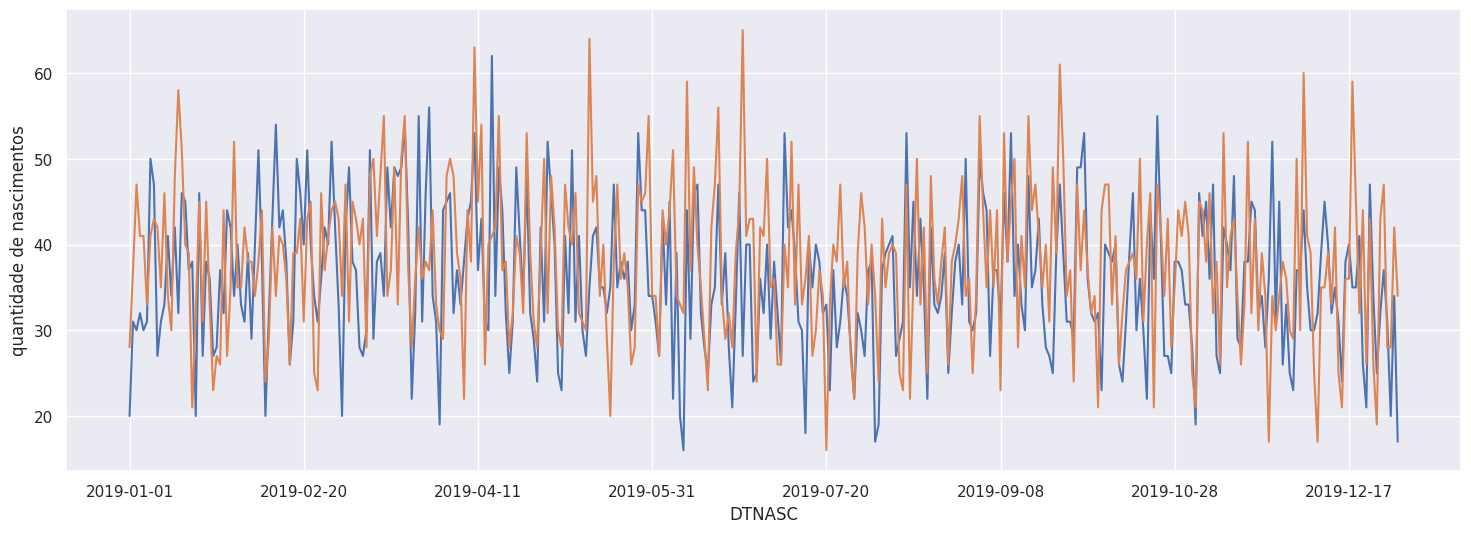

In [32]:
fem.plot(figsize=[18,6])
masc.plot()
plt.ylabel('quantidade de nascimentos');

## 6.3 Quantidade de bebês por dia da semana <a name="exemplo_3"></a>


### Mudando o índice para DTNASC 

In [33]:
sinasc.loc[:,'DTNASC'] = pd.to_datetime(sinasc['DTNASC'])


/tmp/ipykernel_10323/1661513867.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sinasc.loc[:,'DTNASC'] = pd.to_datetime(sinasc['DTNASC'])


In [34]:
sinasc.set_index('DTNASC', inplace=True)

### Criando variável dia da semana de nascimento

In [35]:
#Monday=0, Sunday=6.
sinasc['DIADASEMANA'] = sinasc.index.dayofweek

In [36]:
sinasc.groupby('DIADASEMANA')['IDADEMAE'].count()

DIADASEMANA
0    4493
1    4024
2    4413
3    4138
4    3855
5    3183
6    2922
Name: IDADEMAE, dtype: int64

In [37]:
result = sinasc.groupby('DIADASEMANA')['IDADEMAE'].count()

In [38]:
result.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='DIADASEMANA')

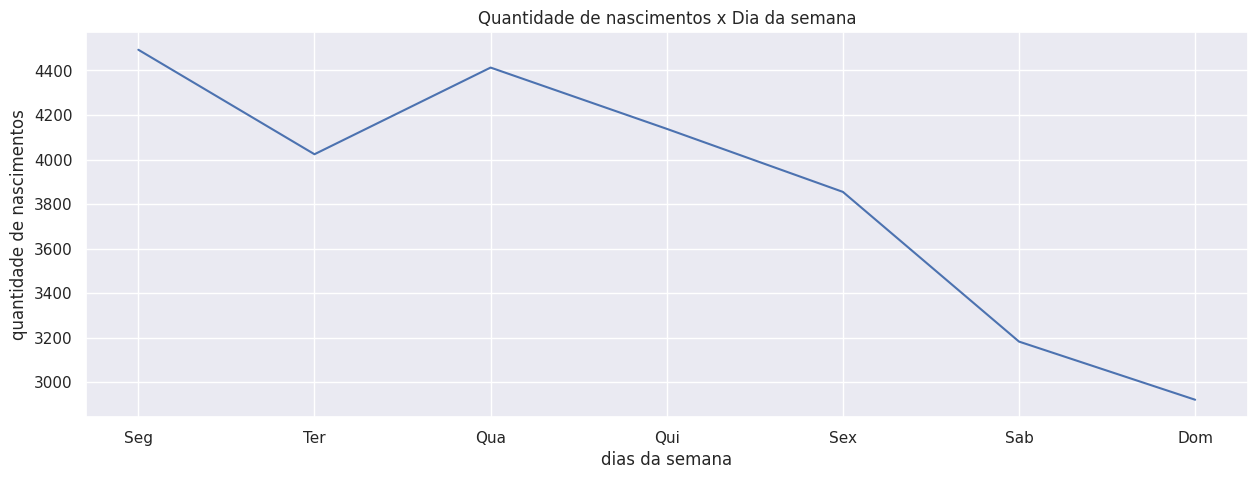

In [39]:
fig, ax = plt.subplots(figsize=[15,5])
result.plot()
ax.set_xticks(result.index)
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
plt.title('Quantidade de nascimentos x Dia da semana')
plt.xlabel('dias da semana')
plt.ylabel('quantidade de nascimentos');

## 6.4 Quantidade de bebês fem e masc por mês <a name="exemplo_4"></a>

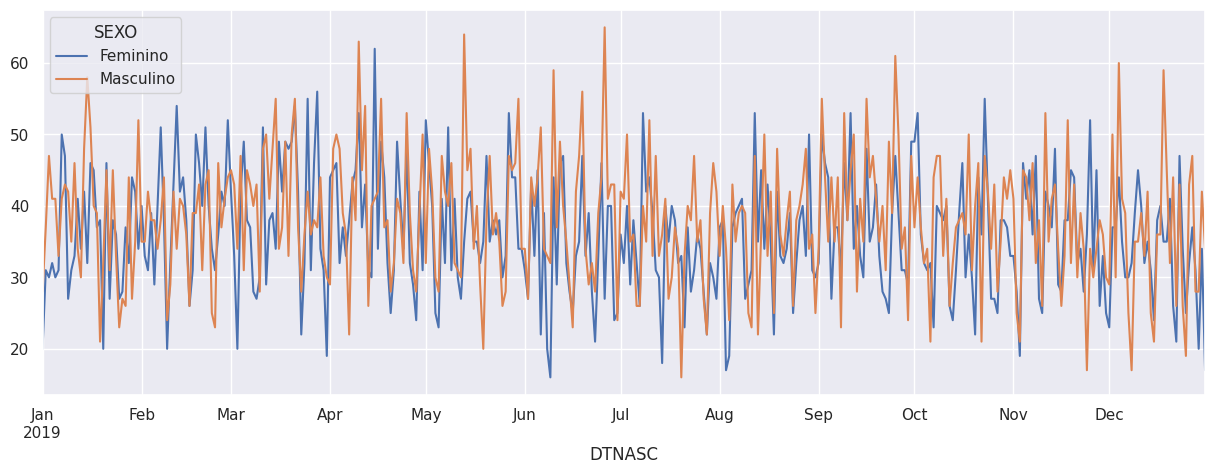

In [40]:
sinasc.groupby(['DTNASC', 'SEXO'])['IDADEMAE'].count().unstack().plot(figsize=[15,5]);

## 6.5 Média peso dos bebês fem e masc<a name="exemplo_5"></a>

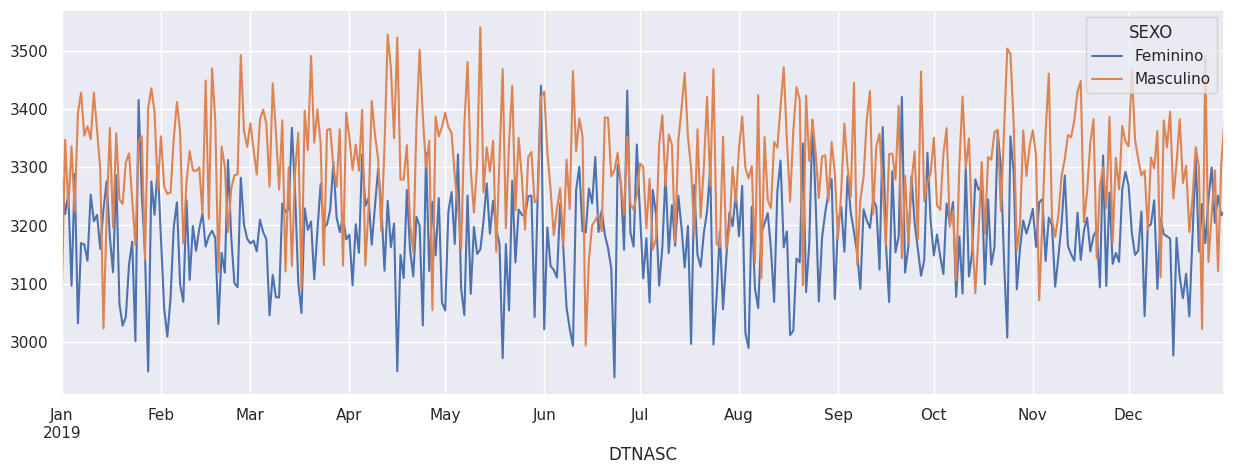

In [41]:
sinasc.groupby(['DTNASC', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);

## 6.6 Escolaridade mãe (ESCMAE) <a name="exemplo_6"></a>


<Axes: xlabel='ESCMAE'>

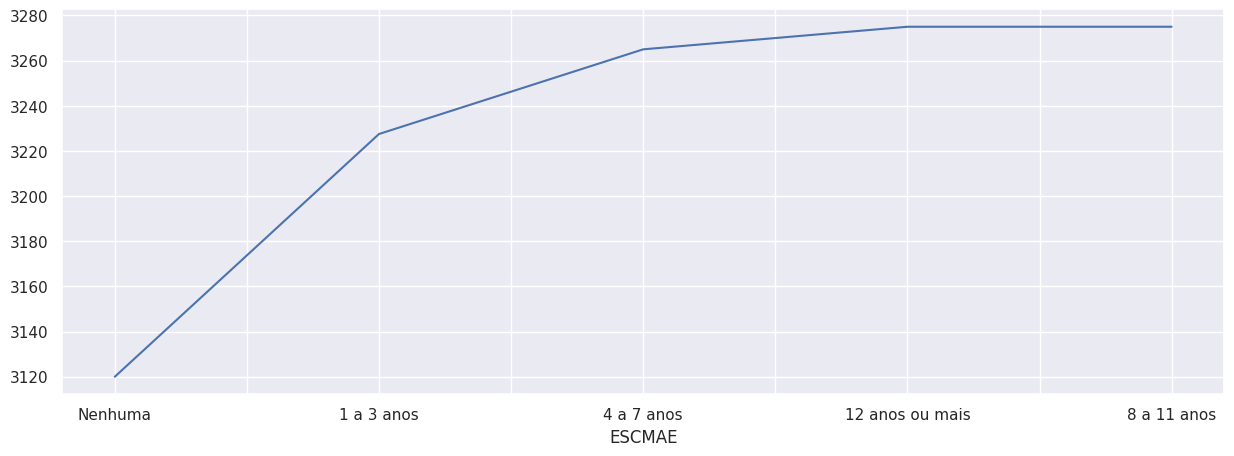

In [42]:
sinasc.groupby(['ESCMAE'])['PESO'].median().sort_values().plot(figsize=[15,5])


In [43]:
sinasc.columns

Index(['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'GESTACAO',
       'GRAVIDEZ', 'ESCMAE', 'IDADEPAI', 'DIADASEMANA'],
      dtype='object')

## 6.7 Gestacão <a name="exemplo_7"></a>

https://pt.wikipedia.org/wiki/Escala_de_Apgar

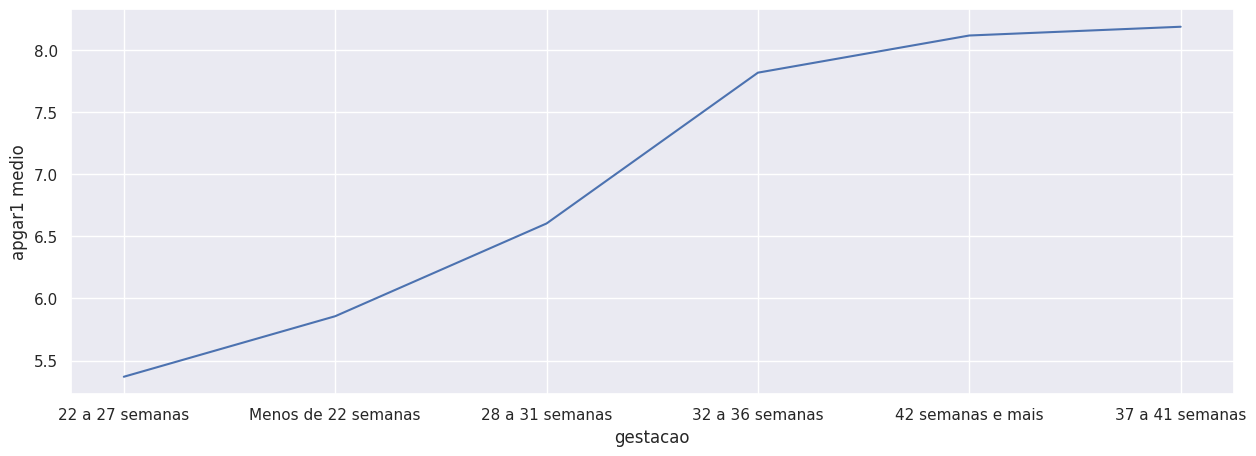

In [44]:
sinasc.groupby('GESTACAO')['APGAR1'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('apgar1 medio')
plt.xlabel('gestacao');

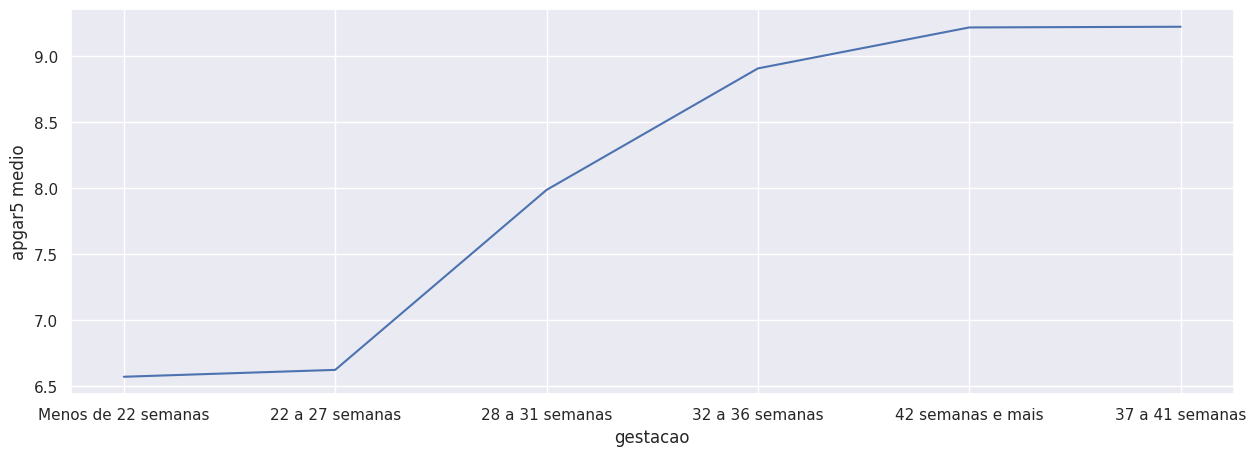

In [45]:
sinasc.groupby('GESTACAO')['APGAR5'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('apgar5 medio')
plt.xlabel('gestacao');